In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
filename='amostra11_dados.csv'
df = pd.read_csv(filename)

In [6]:
df['Tempo (ms)']=1e3*df['Tempo (s)'] # criando uma coluna de tempo  com unidades de milissegundos.

# Gráficos que usam o pacote MATPLOTLIB
As principais vantagens em usar o MATPLOTLIB é que este pacote é bastante maduro, bem documentado e com opções fáceis de formatação:

## gráfico simples:

### Duas curvas sobrepostas

/Users/gsw/miniconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


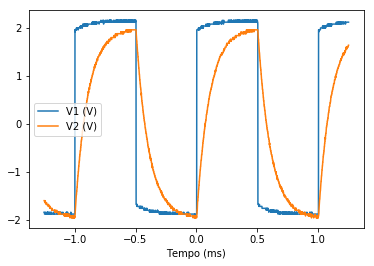

In [7]:
df.plot(x='Tempo (ms)',y=['V1 (V)', 'V2 (V)'])
plt.show()

### Gráficos com subplots

/Users/gsw/miniconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


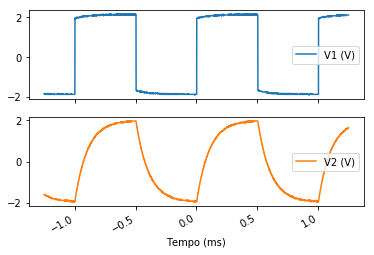

In [8]:
#2 linhas, 1 coluna
df.plot(x='Tempo (ms)',y=['V1 (V)', 'V2 (V)'],subplots=(2,1))
plt.show()

/Users/gsw/miniconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


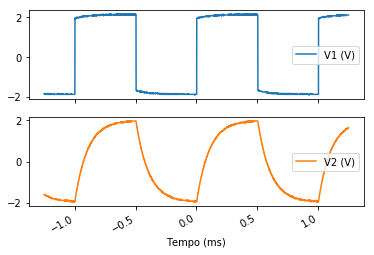

In [9]:
#1 linhas, 2 colunas
df.plot(x='Tempo (ms)',y=['V1 (V)', 'V2 (V)'],subplots=True,sharey=False)
plt.show()

## Ajustando o tamanho das fontes

A seguir é mostrado como gerar um gráfico respeitando o tamanho da página e também das fontes. Isto é fundamental para eliminar a necessidade de ajustar o tamanho do gráfico ao inserí-lo no relatório. Um dos principais problemas decorrentes destes reajustes de tamanho é um gráfico cujas fontes não são legíveis.

In [10]:
#Ajsutando fontes padrão dos gráficos
font = { 'weight' : 'normal',
        'size'   : 10}
plt.rc('font', **font)
#Ajustando espessura das linhas padrão dos gráficos
plt.rcParams['lines.linewidth'] = 2;

### Exemplo 1

/Users/gsw/miniconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


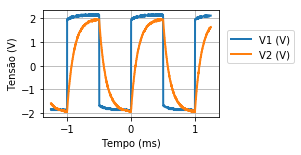

In [11]:
larg = 8/2.54 # o fator 2.45 é para converter centimetros para polegadas!
alt = larg/1.6 #
#--------------
#gerando figura
#--------------
df.plot(x='Tempo (ms)',y=['V1 (V)', 'V2 (V)'],figsize=(larg,alt))
#nome dos eixos
plt.xlabel('Tempo (ms)')
plt.ylabel('Tensão (V)')
#linhas de grade
plt.grid(True)
#legendas
plt.legend(loc=(1.05,0.5))
#salvando PDF
plt.savefig('test_fig.pdf',bbox_inches='tight')
plt.show()

### Exemplo 2

/Users/gsw/miniconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


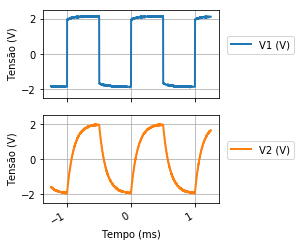

In [12]:
larg = 8/2.54 # o fator 2.45 é para converter centimetros para polegadas!
alt = 2*larg/1.6 #o fator 2* é para contemplar um gráfico maior gerado pelo subplots
#--------------
#gerando figura
#--------------
axes = df.plot(x='Tempo (ms)',y=['V1 (V)', 'V2 (V)'],figsize=(larg,alt),subplots=True)
#nome dos eixos
plt.xlabel('Tempo (ms)')
axes[0].set_ylabel('Tensão (V)')
axes[1].set_ylabel('Tensão (V)')
#linhas de grade
axes[0].grid(True)
axes[1].grid(True)
#legendas
axes[0].legend(loc=(1.05,0.5))
axes[1].legend(loc=(1.05,0.5))
#limite dos eixos
axes[0].set_ylim([-2.5,2.5])
axes[1].set_ylim([-2.5,2.5])
#salvando PDF
plt.savefig('test_fig.pdf',bbox_inches='tight')
plt.show()

Como os dois eixos foram modificados exatamente da mesma forma, é possível economizar código da seguinte forma:

/Users/gsw/miniconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


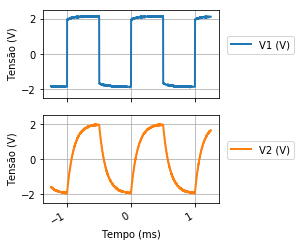

In [13]:
larg = 8/2.54 # o fator 2.45 é para converter centimetros para polegadas!
alt = 2*larg/1.6 #o fator 2* é para contemplar um gráfico maior gerado pelo subplots
#--------------
#gerando figura
#--------------
axes = df.plot(x='Tempo (ms)',y=['V1 (V)', 'V2 (V)'],figsize=(larg,alt),subplots=True)
#nome dos eixos
plt.xlabel('Tempo (ms)')
#neste loop todos as propriedades comuns aos dois eixos
#serão ajustadas
for ax in axes:
    ax.set_ylabel('Tensão (V)')
    #linhas de grade
    ax.grid(True)
    #legendas
    ax.legend(loc=(1.05,0.5))
    #limite dos eixos
    ax.set_ylim([-2.5,2.5])
#salvando PDF
plt.savefig('test_fig.pdf',bbox_inches='tight')
plt.show()